In [1]:
{-# LANGUAGE FlexibleContexts, MonadComprehensions, NoImplicitPrelude, RebindableSyntax, TypeFamilies #-}
import Language.Stochaskell
stochaskell

Stochaskell, version 0.1.0
Copyright (C) 2015-2019 David A Roberts
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under certain conditions; see the LICENSE for details.

Using installation directory at 
  /home/jovyan/stochaskell

In [2]:
mhStep target proposal x = do
  y <- proposal x
  let f = lpdf target
      q = lpdfCond proposal
      a = exp (f y - f x + q y x - q x y)
  accept <- bernoulli (min' 1 a)
  return (if accept then y else x)

In [3]:
import IHaskell.Display

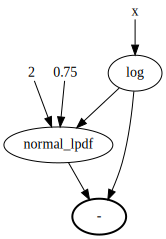

In [4]:
target :: P R
target = do
  z <- normal 2 0.75
  return (exp z)

svg <$> (vizIR . return . lpdf target $ symbol "x")

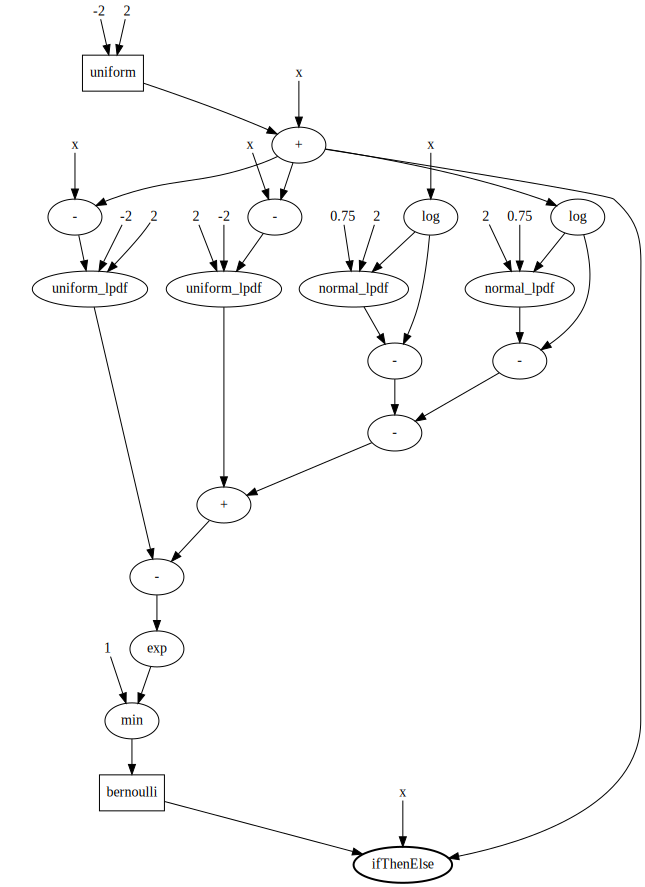

In [5]:
proposal :: R -> P R
proposal x = do
  u <- uniform (-2) 2
  return (x + u)

svg <$> (vizIR . mhStep target proposal $ symbol "x")

In [6]:
samples <- iterateLimit 10000 (runStep (mhStep target proposal)) 1

[runStep]
let v_0_0 = getExternal x_sim_0_0 :: R
    v_0_1 = i_9_0 + x_sim_0_0 :: R
    v_0_2 = log v_0_1 :: R
    v_0_3 = normal_lpdf v_0_2 2.0 0.75 :: R
    v_0_4 = v_0_3 - v_0_2 :: R
    v_0_5 = log i_9_0 :: R
    v_0_6 = normal_lpdf v_0_5 2.0 0.75 :: R
    v_0_7 = v_0_6 - v_0_5 :: R
    v_0_8 = v_0_4 - v_0_7 :: R
    v_0_9 = i_9_0 - v_0_1 :: R
    v_0_10 = uniform_lpdf v_0_9 -2.0 2.0 :: R
    v_0_11 = v_0_8 + v_0_10 :: R
    v_0_12 = v_0_1 - i_9_0 :: R
    v_0_13 = uniform_lpdf v_0_12 -2.0 2.0 :: R
    v_0_14 = v_0_11 - v_0_13 :: R
    v_0_15 = exp v_0_14 :: R
    v_0_16 = min 1.0 v_0_15 :: R
    v_0_17 = getExternal x_sim_0_1 :: B
    v_0_18 = ifThenElse x_sim_0_1 v_0_1 i_9_0 :: R
 in do x_sim_0_0 <- uniform -2.0 2.0 :: P R
       x_sim_0_1 <- bernoulli v_0_16 :: P B
       return [v_0_18]

In [7]:
import Language.Stochaskell.Plot
:opt svg

In [8]:
plotpdf :: String -> P R -> (Double, Double) -> EC (Layout Double Double) ()
plotpdf title prog (a,b) =
  plot $ line title [[(x, exp . real . lpdf prog $ real x) | x <- linspace (a,b) 200]]

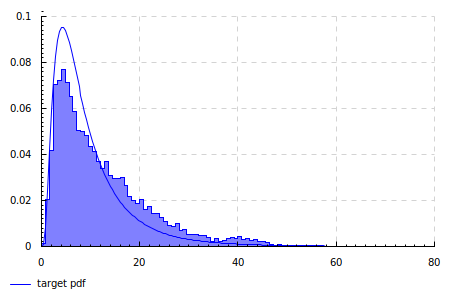

In [9]:
toRenderable $ do
  plot . return . histToPlot $ defaultNormedPlotHist { _plot_hist_values = real <$> samples
                                                     , _plot_hist_bins   = 100
                                                     , _plot_hist_range  = Just (0,80)
                                                     }
  plotpdf "target pdf" target (0,80)

In [10]:
proposal :: R -> P R
proposal x = do
    u <- uniform (1/2) 2
    return (x * u)

samples <- iterateLimit 10000 (runStep (mhStep target proposal)) 1

[runStep]
let v_0_0 = getExternal x_sim_0_0 :: R
    v_0_1 = i_9_0 * x_sim_0_0 :: R
    v_0_2 = log v_0_1 :: R
    v_0_3 = normal_lpdf v_0_2 2.0 0.75 :: R
    v_0_4 = v_0_3 - v_0_2 :: R
    v_0_5 = log i_9_0 :: R
    v_0_6 = normal_lpdf v_0_5 2.0 0.75 :: R
    v_0_7 = v_0_6 - v_0_5 :: R
    v_0_8 = v_0_4 - v_0_7 :: R
    v_0_9 = i_9_0 / v_0_1 :: R
    v_0_10 = uniform_lpdf v_0_9 0.5 2.0 :: R
    v_0_11 = v_0_10 - v_0_2 :: R
    v_0_12 = v_0_8 + v_0_11 :: R
    v_0_13 = uniform_lpdf x_sim_0_0 0.5 2.0 :: R
    v_0_14 = v_0_13 - v_0_5 :: R
    v_0_15 = v_0_12 - v_0_14 :: R
    v_0_16 = exp v_0_15 :: R
    v_0_17 = min 1.0 v_0_16 :: R
    v_0_18 = getExternal x_sim_0_1 :: B
    v_0_19 = ifThenElse x_sim_0_1 v_0_1 i_9_0 :: R
 in do x_sim_0_0 <- uniform 0.5 2.0 :: P R
       x_sim_0_1 <- bernoulli v_0_17 :: P B
       return [v_0_19]

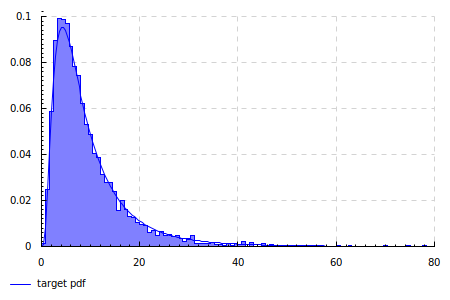

In [11]:
toRenderable $ do
  plot . return . histToPlot $ defaultNormedPlotHist { _plot_hist_values = real <$> samples
                                                     , _plot_hist_bins   = 100
                                                     , _plot_hist_range  = Just (0,80)
                                                     }
  plotpdf "target pdf" target (0,80)